# 11 Deep learning for text

本章介紹<br>
機器學習的文字數據預處理<br>
應用程序用於文字處理的單詞包方法和序列建模方法<br>
Transformer架構<br>
序列到序列學習<br>

在計算機科學中，我們將人類語言（如英語或普通話）稱為“自然”語言，以區別於為機器設計的語言，如彙編、LISP或XML。<br>
每一種機器語言都是經過設計的：它的出發點是一比特人類工程師寫下一套正式的規則來描述你可以用這種語言做什麼陳述以及它們的含義。<br>
規則首先出現，人們只有在規則集完成後才開始使用這種語言。<br>對於人類語言來說，情况正好相反：習慣首先出現，規則隨後出現。<br>
自然語言是由一個進化過程形成的，很像生物有機體，這就是它“自然”的原因。它的“規則”，就像英語的語法一樣，是在事實發生後正式形成的，經常被使用者忽視或破壞。<br>
囙此，儘管機器可讀語言具有高度的結構和嚴謹性，但使用精確的句法規則將其編織在一起，這是完全定義的來自固定詞彙的概念，自然語言是混亂的、模棱兩可的、混亂的、雜亂無章的，而且經常在流動。<br>
創造能够理解自然語言的算灋是一件大事：語言，尤其是文字，是我們大部分交流和文化生產的基礎。互聯網主要是文字。語言是我們儲存幾乎所有知識的管道。我們的思想很大程度上是建立在語言之上的。然而，機器長期無法理解自然語言。有些人曾經天真地認為，你可以簡單地寫下“英語規則集”，就像你可以寫下LISP的規則集一樣。囙此，早期構建自然語言處理（NLP）系統的嘗試是通過“應用語言學”的視角進行的。工程師和語言學家會手工製作複雜的規則集來執行基本的機器翻譯或創建簡單的 聊天機器人喜歡20世紀60年代著名的ELIZA程式，該程式使用模式匹配來維持非常基本的對話。但語言是一種叛逆的東西：它並不容易形式化。 經過幾十年的努力，這些系統的效能仍然令人失望。<br>
手工製定的規則一直是上世紀90年代的主流做法。 但從20世紀80年代末開始，更快的電腦和更高的數據可用性開始使更好的替代方案變得可行。<br>
作為一個聰明的工程師，當你發現自己正在構建一大堆臨時規則的系統時，你很可能會開始問：“我可以使用一個數据集來自動完成這些規則的創建過程嗎？我可以在某種規則空間中蒐索規則，而不是自己去處理它們嗎？”<br>
就像這樣，你已經習慣了做機器學習。<br>
囙此，在20世紀80年代末，我們開始看到機器學習方法處理音調語言。<br>
最早的規則是基於決策樹的，其目的實際上是自動開發以前系統的if/then/else規則。<br>
然後統計方法開始加速，從邏輯回歸開始。隨著時間的推移，學習的參數模型完全佔據了主導地位，語言學應運而生與其說是有用的工具，不如說是一種阻礙。 FrederickJelinek是一比特早期的語音辨識研究者，他在20世紀90年代開玩笑說：“每次我成為語言學家，語音識別器的效能都會提高。<br>
這就是現代NLP的意義：使用機器學習和大型數据集，讓電腦能够不理解語言，這是一個更崇高的目標，而是將一段語言作為輸入，並返回有用的資訊，例如預測以下內容：<br>
“這篇文章的主題是什麼？”（文字分類）<br>
“此文字是否包含濫用？”（內容過濾）<br>
“這段文字聽起來是正面的還是負面的？”（情感分析）<br>
“在這個不完整的內容中，下一個詞應該是什麼？”（語言建模）<br>
“你用德語怎麼說？”（譯文）<br>
“你如何用一段話概括這篇文章？”（摘要）<br>


當然，在本章中，請記住，您將訓練的文字處理模型不具備人類對語言的理解能力；<br>
相反，他們只是在輸入數據中尋找統計規律，這足以在許多簡單的任務中表現出色。<br>
就像電腦視覺是應用於點數的模式識別一樣，NLP是應用於單詞、句子和段落的模式識別。<br>


NLP決策樹的工具集邏輯回歸僅在20世紀90年代到2010年代早期經歷了緩慢的演變。 大部分研究重點是特徵工程。 2013年，當我在Kaggle上贏得第一次NLP比賽時，你猜到了，我的模型是基於決策樹和邏輯回歸的。 然而，在2014-2015年左右，情况終於開始改變。 年，多名研究人員開始研究遞迴神經網路的語言理解能力

特別是LSTM，這是20世紀90年代末的一種序列處理算灋，在那之前一直處於雷達之下。
2015年初，Keras推出了第一個開源、易於使用的LSTM實現，這正是人們對遞迴神經網路重新產生興趣的開始，直到那時，只有“研究程式碼”無法輕易重用。然後從2015年到2017年，遞迴神經網路主導了蓬勃發展的NLP場景。特別是雙向LSTM模型，它為許多重要任務（從摘要到問題解答再到機器翻譯）設定了藝術狀態。
最後，在2017–2018年左右，一種新的架構興起，取代了RNNs:Transformer，您將在本章下半部分瞭解它。變形金剛在短時間內在整個領域取得了長足的進步，如今大多數NLP系統都是基於變形金剛。

讓我們深入瞭解細節。 本章將帶您從基礎知識到使用Transformer進行機器翻譯。

# 11.2 Preparing text data

深度學習模型是可區分的函數，只能處理數位張量：它們不能將原始文字作為輸入。
向量化文字是將文字轉換為數位張量的過程。文字向量化過程有多種形狀和形式，但它們都遵循相同的範本（見圖11.1）

首先，將文字標準化以使其更容易處理，例如將其轉換為小寫或移動標點符號。
您將文字折開為組織（稱為標記），例如字元、單詞或單詞組。這叫做標記化。
將每個這樣的標記轉換為數位向量。這通常涉及首先索引所有權杖

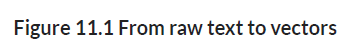

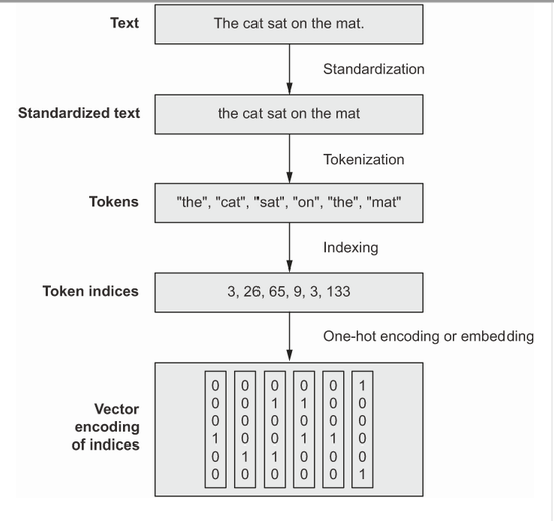

In [1]:
import string

class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)

vectorizer = Vectorizer()
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

In [2]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)

[2, 3, 5, 7, 1, 5, 6]


In [3]:
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)


i write rewrite and [UNK] rewrite again


In [4]:
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",
)

In [5]:
import re
import string
import tensorflow as tf

def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)
    return tf.strings.regex_replace(
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")

def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)

text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)

In [6]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
text_vectorization.adapt(dataset)


Displaying the vocabulary

In [7]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'erase',
 'write',
 'then',
 'rewrite',
 'poppy',
 'i',
 'blooms',
 'and',
 'again',
 'a']

In [8]:
vocabulary = text_vectorization.get_vocabulary()
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = text_vectorization(test_sentence)
print(encoded_sentence)


tf.Tensor([ 7  3  5  9  1  5 10], shape=(7,), dtype=int64)


In [9]:
inverse_vocab = dict(enumerate(vocabulary))
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


# Two approaches for representing groups of words: Sets and sequences
Preparing the IMDB movie reviews data

In [10]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7585k      0  0:00:10  0:00:10 --:--:-- 15.0M


In [11]:
!rm -r aclImdb/train/unsup

In [12]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [13]:
import os, pathlib, shutil, random

base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)


In [14]:
from tensorflow import keras
batch_size = 32

train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


Displaying the shapes and dtypes of the first batch

In [15]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break


inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor(b'This Raggedy Ann and Andy Movie is so adorable. We love watching Ann and Andy sing and dance, along with the camel with the wrinkled knees. This movie is what made the Camel with the Wrinkled Knees so popular, singing his song, "I\'m nobodies I Love You". If you love Raggedy Ann and Andy Watch the movie and you will see why it\'s a movie the kids love, and adults!', shape=(), dtype=string)
targets[0]: tf.Tensor(1, shape=(), dtype=int32)


# Processing words as a set: The bag-of-words approach<br>
Single words (unigrams) with binary encoding<br>
Preprocessing our datasets with a TextVectorization layer<br>

In [16]:
text_vectorization = TextVectorization(
    max_tokens=20000,
    output_mode="multi_hot",
)
text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

Inspecting the output of our binary unigram dataset

In [17]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([0. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(0, shape=(), dtype=int32)


Our model-building utility

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

Training and testing the binary unigram model

In [19]:
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_1gram.keras",
                                    save_best_only=True)
]
model.fit(binary_1gram_train_ds.cache(),
          validation_data=binary_1gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 16)                320016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 14s 21ms/step - loss: 0.4025 - accuracy: 0.8307 - val_loss: 0.2952 - val_accuracy: 0.8806
Epoch 2/10
625/625 [=======================

Bigrams with binary encoding<br>
Configuring the TextVectorization layer to return bigrams<br>

In [20]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)


Training and testing the binary bigram model

In [21]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
                                    save_best_only=True)
]
model.fit(binary_2gram_train_ds.cache(),
          validation_data=binary_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_2 (Dense)             (None, 16)                320016    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 16s 24ms/step - loss: 0.3784 - accuracy: 0.8424 - val_loss: 0.2837 - val_accuracy: 0.8926
Epoch 2/10
625/625 [=====================

Bigrams with TF-IDF encoding<br>
Configuring the TextVectorization layer to return token counts<br>

In [22]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="count"
)


Configuring TextVectorization to return TF-IDF-weighted outputs

In [23]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf_idf",
)


Training and testing the TF-IDF bigram model

In [24]:
text_vectorization.adapt(text_only_train_ds)

tfidf_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
                                    save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_4 (Dense)             (None, 16)                320016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 13s 19ms/step - loss: 0.4779 - accuracy: 0.7906 - val_loss: 0.3449 - val_accuracy: 0.8666
Epoch 2/10
625/625 [=====================

In [25]:
inputs = keras.Input(shape=(1,), dtype="string")
processed_inputs = text_vectorization(inputs)
outputs = model(processed_inputs)
inference_model = keras.Model(inputs, outputs)

In [26]:
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."],
])
predictions = inference_model(raw_text_data)
print(f"{float(predictions[0] * 100):.2f} percent positive")

98.08 percent positive
